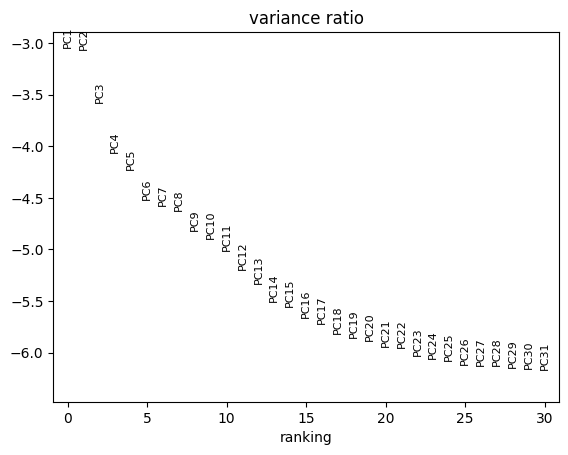

In [2]:
import scanpy as sc
adata = sc.read("/mnt/c/Users/sneha/BrainCellAtlas/data/human_mtg_brain_atlas.h5ad")
sc.tl.pca(adata,svd_solver='arpack') #principal component analysis with hvg data which is normalized and log transformed
sc.pl.pca_variance_ratio(adata,log=True)

/tmp/ipykernel_21355/505079145.py:6: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata,resolution=0.8)


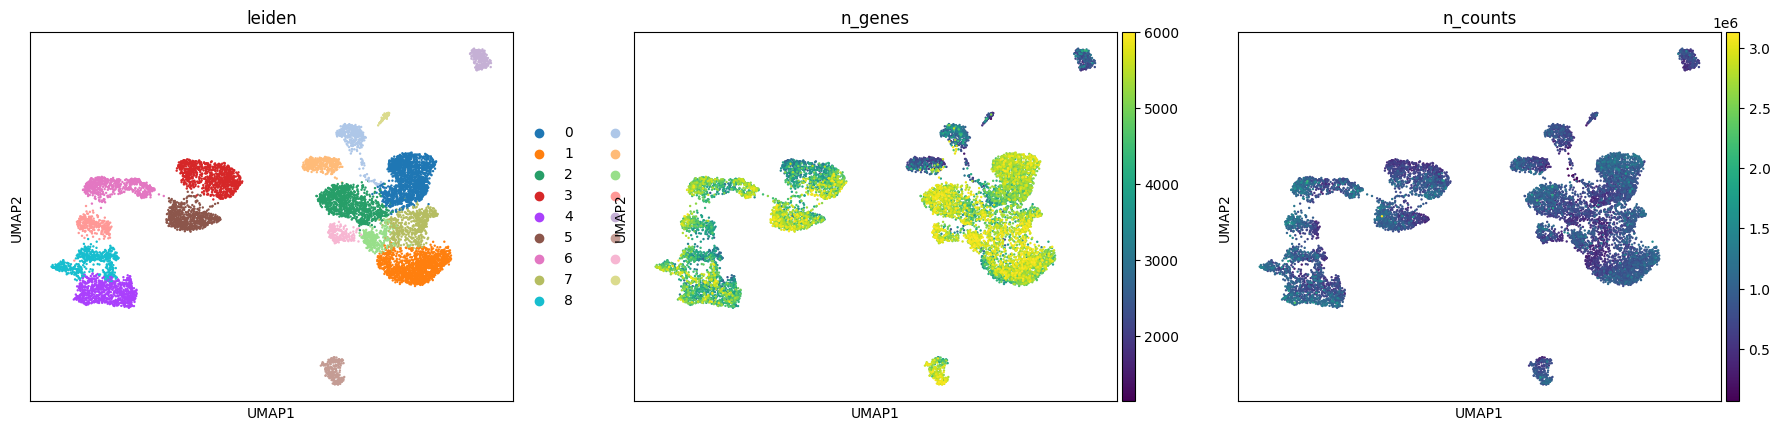

In [5]:
import igraph
import leidenalg

sc.pp.neighbors(adata, n_neighbors=15,n_pcs=25)
sc.tl.umap(adata)
sc.tl.leiden(adata,resolution=0.8)
sc.pl.umap(adata,color=['leiden', 'n_genes', 'n_counts'])

In [8]:
import scanpy as sc
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon', n_genes=20)
print("finding marker genes for each cluster")

finding marker genes for each cluster


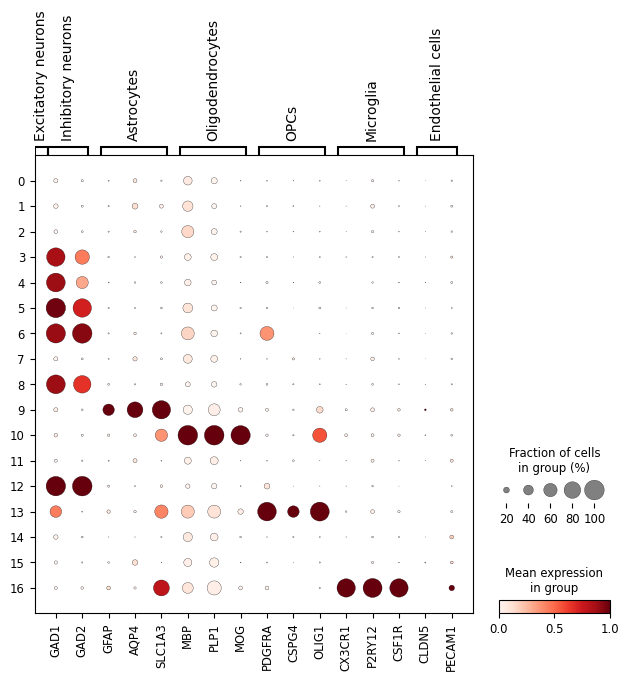

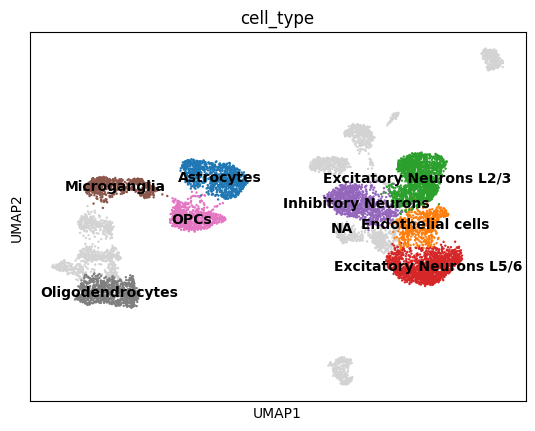

In [15]:
# Canonical brain cell type marker genes
markers = {
    'Excitatory neurons': [
       
    ],

    'Inhibitory neurons': [
        'GAD1',
        'GAD2',
    ],

    'Astrocytes': [
        'GFAP',
        'AQP4',
        'SLC1A3'   # EAAT1
    ],

    'Oligodendrocytes': [
        'MBP',
        'PLP1',
        'MOG'
    ],

    'OPCs': [
        'PDGFRA',
        'CSPG4',   # NG2
        'OLIG1'
    ],

    'Microglia': [
        'CX3CR1',
        'P2RY12',
        'CSF1R'
    ],

    'Endothelial cells': [
        'CLDN5',
        'PECAM1'
    ]
}
sc.pl.dotplot(adata, markers,  groupby='leiden',  use_raw=True,standard_scale='var')

#manual annotation
cluster_annotations={
    '0':'Excitatory Neurons L2/3',
    '1':'Excitatory Neurons L5/6',
    '2':'Inhibitory Neurons',
    '3':'Astrocytes',
    '4':'Oligodendrocytes',
    '5':'OPCs',
    '6':'Microganglia',
    '7':'Endothelial cells',
}
adata.obs['cell_type']=adata.obs['leiden'].map(cluster_annotations)
sc.pl.umap(adata,color='cell_type', legend_loc='on data')